In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import skew, boxcox_normmax, norm
from scipy.special import boxcox1p
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


Guidance From 
https://www.kaggle.com/code/jesucristo/1-house-prices-solution-top-1/notebook?scriptVersionId=12846740 
https://www.kaggle.com/code/gvyshnya/feature-importance-for-linear-regression-ahp-case

**Competition Challenge And Goal**  
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.  
With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges  to predict the final price of each home.
Goal of this work would be to do exploratory data analysis and understand about the data. 

**Data Explaination**  
The data consists of 81 columns in total. Excluding Id and SalePrice, there are 79 feature variables that can help to predict the house prices.
The total number of house enteries both in train and test data are (2919,80), where train data contains (1460,80) and test data contains (1459,79) enterie. The target variable (SalePrice) is excluded from test_data.    
The wide set of feature variables help to understand different aspects of while purchasing a house. We'll explore the data to understand which features play significant role that effects the price of a house, the positive and negative impact of minor details, relationships of features, trends and patterns that effect house pricing. 

**Read And Load Data**

In [2]:
train_data = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv",  index_col="Id")
test_data = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv",  index_col="Id")
dummy_testdata=pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")
# Merge the splits so we can process them together
df = pd.concat([train_data, test_data])
# set seed for reproducibility
np.random.seed(0) 

**Dataset Structure and Basic Understanding**

In this section we will explore the dataset structure and get a general overview about the data. We will see the quality of the data, understand the distrubtion of the data, how many numerical and categorical variables and missing values.

In [3]:
print("dataframe shape",df.shape)
print("train data shape",train_data.shape)
print("test data shape",test_data.shape)

dataframe shape (2919, 80)
train data shape (1460, 80)
test data shape (1459, 79)


In [4]:
# 
# df.head(10).style.background_gradient(cmap = "viridis")

In total there are 37 numerical and 43 categorical variables. We can clearly see many columns are missing values. Sale Price has 1460 because its only in train data and not in test_data. The feature/predictor variables  roughly cover details such as area, neighborhood, garage, quality, design/features and year built information. 

We can see all  numerical predictor variables min-max range, mean and standard deviations and total count. We examine some of the common 
features looked   while determing the sale price of a house such as Lot Area, Overall Qaulity and Condition, Year Built and Sale Price.     
Sale Price :Max USD 75,5000 and min is USD34900. Mean of 180921, median of 163000, std 79442. Tells us that it is right skwed and not dispersed.   
Overall Qual: Max 10 and min 1, mean and median is 6 and std dev of 1.4. zero skewed and not dispered. 
Overall Cond: Max 9 and min 1, mean is 5.0 and median is 50 and std dev of 1. slight right skewed and not dispered.   
LotArea: Max 215245 and min 1300, mean is 10168 and median is 9453 and std dev of 7886.  right skewed and not dispered.   
YearBuilt: Max 2010 and min 1872, mean is 1972 and median is 1973 and std dev of 30.  left skewed and not dispered.   
TotalBsmtSF: Max 6110 and min 0, mean is 1051 and median is 989 and std dev of 440.  right skewed and not dispered.   




In [5]:
# plt.figure(figsize=(10,5))
# subsetdf=df[['LotArea','OverallCond',"OverallQual",'YearBuilt',
#              "TotalBsmtSF","GarageArea","GarageCars","1stFlrSF","2ndFlrSF",
#              "MasVnrArea","GrLivArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","SalePrice"]]
# sns.heatmap(subsetdf.corr(),cbar=True,annot=True,cmap='Blues')


Correlating some numerical features from the heat map, for initial observation of relationships. 

In [6]:
# var_num = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath", "YearBuilt", "MiscVal"]
# sns.pairplot(df[var_num]);

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

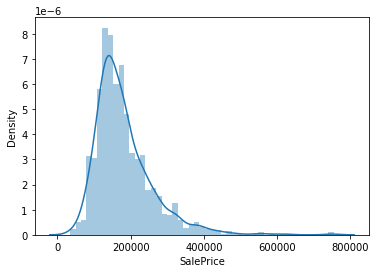

In [7]:
sns.distplot(df["SalePrice"])


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

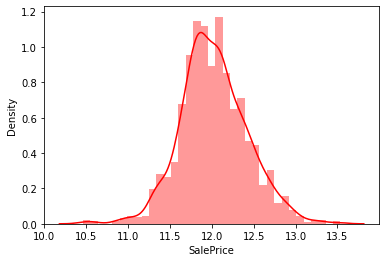

In [8]:
df = df[df.GrLivArea < 4500]

df.reset_index(drop=True, inplace=True)
df["SalePrice"] = np.log1p(df["SalePrice"])
sns.distplot(df["SalePrice"],color = 'r')


**Missing Values Analysis**


In [9]:
#number of missing data points per column
missing_values_count = df.isnull().sum()
# print(missing_values_count)
# Percentage of missing values 
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print("percent_missing: ",percent_missing)  # 6.60% 


percent_missing:  6.606652949245542


<AxesSubplot:>

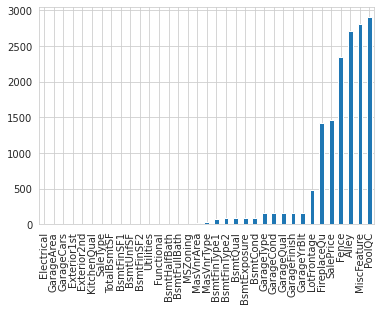

In [10]:
sns.set_style("whitegrid")
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [11]:
#sort the missing values series
sorted_missing_values_count = missing_values_count.sort_values(ascending=False)

#  all columns with at least one missing value
columns_with_no_na = df.dropna(axis=1)
columns_with_no_na.head()

# just how much columns did we lose?
columns_with_na= df.shape[1] - columns_with_no_na.shape[1]
print("Columns in original dataset: %d \n" % df.shape[1])
print("Columns with na's  %d" % columns_with_na)

#to cross check how many coloumns, we have at least one missing value
coloumn_missingvalues_count  = sorted_missing_values_count[sorted_missing_values_count != 0]
print("columns with missing values " , len(coloumn_missingvalues_count)) 
# there are 35 columns with na


Columns in original dataset: 80 

Columns with na's  35
columns with missing values  35


****Examination of features with missing values.****  
Seeing from the results it seems that PoolQC, MiscFeature, Alley, Fence, FirePlaceQu missing more than 50 % of the values.   
**PooLQC:** we can assume that not every house has pool avalaible in it and only few houses have a pool, thus we can easily replace the missing values with NA (no pool). 

Similarly MiscFeature, Alley, Fence, FireplaceQu missing values can be filled with NA as not every house would have these things.  
LotFrontage  As this is numerical and are values in feet, so the missing values can be replaced by the mean value. 
GarageFinish missing values with NA  
GarageYrBlt, GarageCond, GarageFinish, GarageQual:  Missing values can be replaced with NA as it is assumed they are linked with garage type because if theres no garage then there can't be a value for these instances.  
BsmtFinType2, BsmtExposure, BsmtQual, BsmtFinType1 missing values with NA  
MasVnrArea missing values in masonry vaneer area can be filled with 0.0.   
MasVnrType missing values can be filled with None.   
Electrical has one missing value, which can be replaced with NA(in this case Not avalibale.) - which can be changed after seeing the correlation with other features.   





We will Analyze the  relevant columns relationships, and we'll convert the qualitative data into nominal, ordinal and one-hot encoding.  
Variables Categorization with help of data description.   
Floors - LowQualFinSF, 1stFlrSF, 2ndFlrSF,   
Porch - OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch  
Rooms Above Grade - BedroomAbvGr, TotRmsAbvGrd
Basement - BsmtFinType2,BsmtExposure,BsmtQual,BsmtCond,BsmtFinType1,BsmtHalfBath,BsmtFullBath,  
           BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF  
Bath - HalfBath, FullBath  
Living Area - GrLivArea  
Kitchen - KitchenQual, KitchenAbvGr,   
Garage - GarageYrBlt,GarageCond,GarageType,GarageQual,'GarageFinish,GarageArea,"GarageCars,
Location -  Neighborhood, Street, Condition1,Condition2
Heating/Cooling - CentralAir, Heating, HeatingQC. 
Pool - PoolQC, PoolArea
Building - BldgType  
Overall - OverallQual, OverallCond
Fence - Fence
FirePlace - FireplaceQu, Fireplaces
Structure - Exterior1st, Exterior2nd,
Property - LandSlope, LotConfig, LandContour, LotShape, Alley, LotSize, LotFrontage
Style - MSSubClass, HouseStyle 

In [12]:
#Oridinal Encoded dicts

ordinal_dict1={"NA":0, "Po":1, "Fa":2,"TA":3,"Gd":4,"Ex":5}
ordinal_lotshape={'IR3':0, 'IR2':1, 'IR1':2, 'Reg':3}
ordinal_masvnrtype={'None':0, 'BrkCmn':0, 'BrkFace':1, 'Stone':2}
ordinal_bsmtexp={'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4}
ordinal_bsmtfintype={'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}
ordinal_centralair={'N':0, 'Y':1}
ordinal_functional={'Sal':0, 'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7}
ordinal_garagefinish={'NA':0, 'Unf':1, 'RFn':2, 'Fin':3}
ordinal_pavedrive={'N':0, 'P':1,'Y':2}
# ordinal_mszoning={'C (all)':'C','A':'A','RL':'RL', 'RM':'RM', 'FV':'FV', 'RH':'RH', 'I':"I"}

ordinal_neigh= {
    'MeadowV': 1,'IDOTRR': 1,'BrDale': 1,
    'BrkSide': 2,'OldTown': 2,'Edwards': 2,'Sawyer': 3,'Blueste': 3,'SWISU': 3,
    'NPkVill': 3,'NAmes': 3,'Mitchel': 4,'SawyerW': 5,'NWAmes': 5,'Gilbert': 5,'Blmngtn': 5,'CollgCr': 5,
    'ClearCr': 6,'Crawfor': 6,'Veenker': 7,'Somerst': 7,'Timber': 8,'StoneBr': 9,
    'NridgHt': 10,'NoRidge': 10
}
                

In [13]:
#Filling up Missing values with NA, None and 0. 

df=df.fillna({'PoolQC':'NA','MiscFeature':'NA','Alley':'NA','Fence':'NA', 'FireplaceQu':'NA'})
df = df.fillna({'LotFrontage': df['LotFrontage'].mean()})
df =df.fillna({'GarageYrBlt':'0', 'GarageCond':'NA','GarageType':"NA",
               "GarageQual":"NA",'GarageFinish':'NA',
              "GarageArea":0,"GarageCars":0})
df =df.fillna({
                'BsmtFinType2':'NA', 'BsmtExposure':'NA',
                'BsmtQual':'NA', 'BsmtCond':'NA', 'BsmtFinType1':'NA', 
                "BsmtHalfBath" : 0,   "BsmtFullBath":0,  
                "BsmtFinSF1": 0, "BsmtFinSF2":0, "BsmtUnfSF":0, 
                "TotalBsmtSF":0})

df = df.fillna({'MasVnrArea':0,'MasVnrType':"None", "MSZoning": "NA"  })

df = df.fillna({"Utilities":df['Utilities'].mode()[0],'Electrical':df['Electrical'].mode()[0]})

df = df.fillna({"Functional":df['Functional'].mode()[0],"Exterior2nd":df['Exterior2nd'].mode()[0],
                "Exterior1st":df['Exterior1st'].mode()[0], "SaleType":df['SaleType'].mode()[0], 
                "KitchenQual":"NA" })



np.sort(df.columns)
# df[column_names_with_nv].isnull().sum()
#Check to confirm data is free from missing values.
#The missing values are filled. 
# complete_house_price_data = complete_house_pri/ce_data.drop(columns=['Id'])

array(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual',
       'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces',
       'Foundation', 'FullBath', 'Functional', 'GarageArea', 'GarageCars',
       'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenAbvGr', 'KitchenQual', 'LandContour',
       'LandSlope', 'LotArea', 'LotConfig', 'LotFrontage', 'LotShape',
       'LowQualFinSF', 'MSSubClass', 'MSZoning', 'MasVnrArea',
       'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold', 'Neighborhood',
       'OpenPorchSF', 'OverallCond', 'OverallQual', 'PavedDrive',
       'PoolArea', 'P

Object columns to be converted to categorical.  
MSZoning, Alley, LandContour, street, LotConfig, LandSlope,Neighborhood, Condition1 
Condition2, BldgType, HouseStyle,RoofStyle, RoofMatl, Exterior1s, Exterior2nd,  
Heating, Electrical, GarageType, GarageYrBlt, Fence, MiscFeature,  SaleType, SaleCondition  
Ordinal Label   
LotShape (0,1,2,3)  
Utilities (AllPub except 1)
MasVnrType  
ExterQual, ExterCond  
BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2
HeatingQC, CentralAir  
KitchenQual, Functional, FireplaceQu  
GarageFinish', 'GarageQual', 'GarageCond
PavedDrive  
PoolQC

Converting data into ordinal and label encoding

In [14]:


df['LotShape']=df['LotShape'].map(ordinal_lotshape).astype(int)
df['MasVnrType']=df['MasVnrType'].map(ordinal_masvnrtype).astype(int)
df['ExterQual']=df['ExterQual'].map(ordinal_dict1).astype(int)
df['ExterCond']=df['ExterCond'].map(ordinal_dict1).astype(int)
df['BsmtQual']=df['BsmtQual'].map(ordinal_dict1).astype(int)
df['BsmtCond']=df['BsmtCond'].map(ordinal_dict1).astype(int)
df['BsmtExposure']=df['BsmtExposure'].map(ordinal_bsmtexp).astype(int)
df['BsmtFinType1']=df['BsmtFinType1'].map(ordinal_bsmtfintype).astype(int)
df['BsmtFinType2']=df['BsmtFinType2'].map(ordinal_bsmtfintype).astype(int)
df['HeatingQC']=df['HeatingQC'].map(ordinal_dict1).astype(int)
df['CentralAir']=df['CentralAir'].map(ordinal_centralair).astype(int)
df['KitchenQual']=df['KitchenQual'].map(ordinal_dict1).astype(int)
df['Functional']=df['Functional'].map(ordinal_functional).astype(int)
df['FireplaceQu']=df['FireplaceQu'].map(ordinal_dict1).astype(int)
df['GarageFinish']=df['GarageFinish'].map(ordinal_garagefinish).astype(int)
df['GarageQual']=df['GarageQual'].map(ordinal_dict1).astype(int)
df['GarageCond']=df['GarageCond'].map(ordinal_dict1).astype(int)
df['PavedDrive']=df['PavedDrive'].map(ordinal_pavedrive).astype(int)
df['PoolQC']=df['PoolQC'].map(ordinal_dict1).astype(int)

df['Neighborhood']=df['Neighborhood'].map(ordinal_neigh).astype(int)


In [15]:
df['MSZoning']=df['MSZoning'].astype("category")


df['Street']=df['Street'].astype("category")
df['Alley']=df['Alley'].astype("category")
df['LandContour']=df['LandContour'].astype("category")
df['LotConfig']=df['LotConfig'].astype("category")
df['LandSlope']=df['LandSlope'].astype("category")
df['Condition1']=df['Condition1'].astype("category")
df['Condition2']=df['Condition2'].astype("category")
df['Foundation']=df['Foundation'].astype("category")
df['BldgType']=df['BldgType'].astype("category")
df['HouseStyle']=df['HouseStyle'].astype("category")
df['RoofStyle']=df['RoofStyle'].astype("category")
df['RoofMatl']=df['RoofMatl'].astype("category")
df['Exterior1st']=df['Exterior1st'].astype("category")
df['Exterior2nd']=df['Exterior2nd'].astype("category")
df['Heating']=df['Heating'].astype("category")
df['Electrical']=df['Electrical'].astype("category")
df['GarageType']=df['GarageType'].astype("category")
df['GarageYrBlt']=df['GarageYrBlt'].astype('int')
df['Fence']=df['Fence'].astype("category")
df['MiscFeature']=df['MiscFeature'].astype("category")
df['SaleType']=df['SaleType'].astype("category")
df['SaleCondition']=df['SaleCondition'].astype("category")
# Features which numerical on data but should be treated as category.
df['MSSubClass'] = df['MSSubClass'].astype(str)
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)


NEW FEATURES

In [16]:
df['haspool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df['has2ndfloor'] = df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df['hasgarage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df['hasbsmt'] = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df['hasfireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [17]:

df['TotalSF']=df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

df['TotalSF'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'] +  df['1stFlrSF'] + df['2ndFlrSF'])

df['TotalBathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))

df['TotalPorchSF'] = (df['OpenPorchSF'] + df['3SsnPorch'] +df['EnclosedPorch'] + df['ScreenPorch'] + df['WoodDeckSF'])

df['TotalExtQual'] = (df['ExterQual'] + df['ExterCond'])
df['TotalBsmQual'] = (df['BsmtQual'] + df['BsmtCond'] + df['BsmtFinType1'] + df['BsmtFinType2'])
df['TotalGrgQual'] = (df['GarageQual'] + df['GarageCond'])
df['TotalQual'] = df['OverallQual'] + df['TotalExtQual'] + df['TotalBsmQual'] + df['TotalGrgQual'] + df['KitchenQual'] + df['HeatingQC']


Features to be dropped. 

In [18]:
drop_features= [
    'Utilities',
    "MSZoning",
    'PoolQC',
    'YrSold',
    'MoSold',
    'ExterQual',
    'BsmtQual',
    'GarageQual',
    'KitchenQual',
    'HeatingQC',
    "Street",
    "Alley",
    'MiscVal'
]

# Dropping ML-irrelevant features

df.drop(columns=drop_features, inplace=True)

In [19]:
#checking the cardinality of the categorical variables. 
obj_df=df.select_dtypes(include=['category']).copy()
object_cols=obj_df.columns
# Get number of unique entries in each column with categorical data
object_nunique = list(map(lambda col: df[col].nunique(), object_cols))
d = dict(zip(object_cols, object_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

[('LandSlope', 3),
 ('LandContour', 4),
 ('LotConfig', 5),
 ('BldgType', 5),
 ('Electrical', 5),
 ('Fence', 5),
 ('MiscFeature', 5),
 ('RoofStyle', 6),
 ('Foundation', 6),
 ('Heating', 6),
 ('SaleCondition', 6),
 ('RoofMatl', 7),
 ('GarageType', 7),
 ('Condition2', 8),
 ('HouseStyle', 8),
 ('Condition1', 9),
 ('SaleType', 9),
 ('Exterior1st', 15),
 ('Exterior2nd', 16)]

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

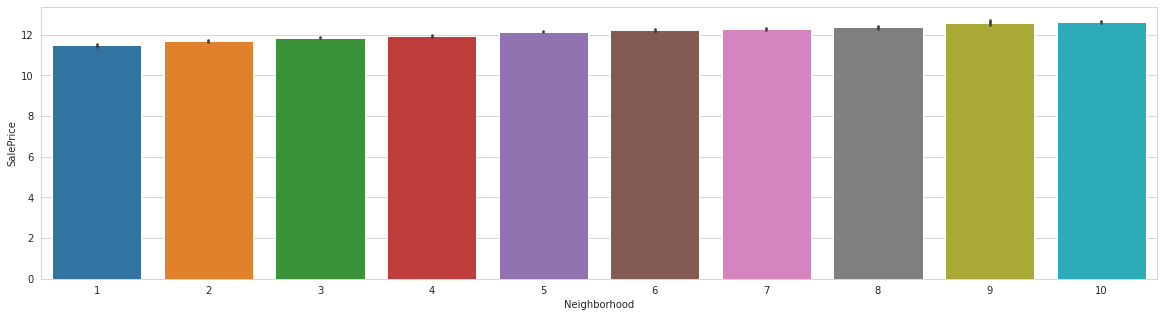

In [20]:
# Checking distribution of SalePrice with respect to neighborhood
plt.figure(figsize=(20,5))

sns.barplot(df['Neighborhood'],df['SalePrice'])
# sns.histplot(x=df['Neighborhood'],y=df['SalePrice'])

It can be seen that neighborhoods such as NoRigde, NrighHt, StoneBr have the highest saleprice. 
We can further see what time of features the homes in these locations have to understand their high price. 

**Transforming The Skewed Features**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LowQualFinSF', ylabel='Density'>

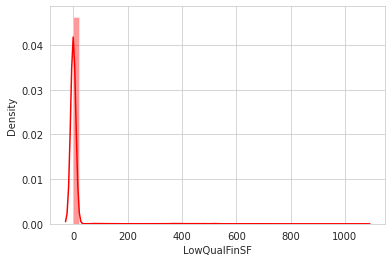

In [21]:
sns.distplot(df['LowQualFinSF'],color = 'r')

In [22]:
features_to_skew = [
    'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
    'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
    'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
    'ScreenPorch', 'PoolArea', 'LowQualFinSF'
]

# Finding skewness of the numerical features

skew_features = np.abs(df[features_to_skew].apply(lambda x: skew(x)).sort_values(
    ascending=False))

# Filtering skewed features

high_skew = skew_features[skew_features > 0.3]

# Taking indexes of high skew

skew_index = high_skew.index

# Applying boxcox transformation to fix skewness

for i in skew_index:
    df[i] = boxcox1p(df[i], boxcox_normmax(df[i] + 1))

/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:4053: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LowQualFinSF', ylabel='Density'>

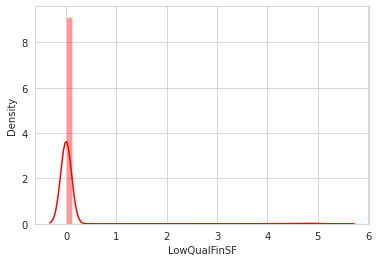

In [23]:
sns.distplot(df['LowQualFinSF'],color = 'r')

Label Encoding The Categorical Variables¶


In [24]:
# Getting dummy variables for ategorical data
dataset = pd.get_dummies(data=df)




In [25]:
train = dataset.loc[:1456, :]
test = dataset.loc[1457:, :]
print(train.shape,test.shape)

(1457, 210) (1459, 210)


In [26]:
test =test.drop(columns="SalePrice")

In [27]:
X = train
X_test = test


In [28]:
X = train.copy()
y = X.pop("SalePrice")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [29]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)

mi_scores=mi_scores[mi_scores>0.1]  # show a few features with their MI scores


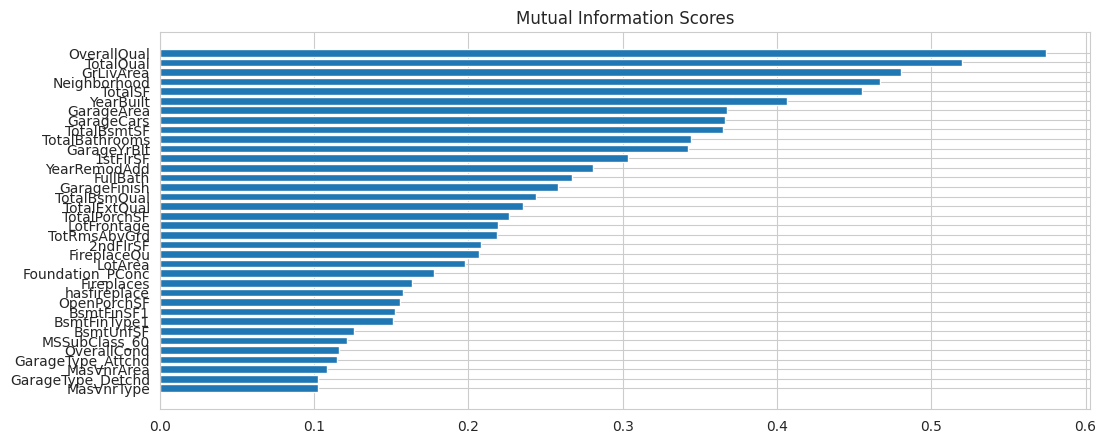

In [30]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(12, 5))
plot_mi_scores(mi_scores)

In [31]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, n_init=10, random_state=0)
X["Cluster"] = kmeans.fit_predict(X)

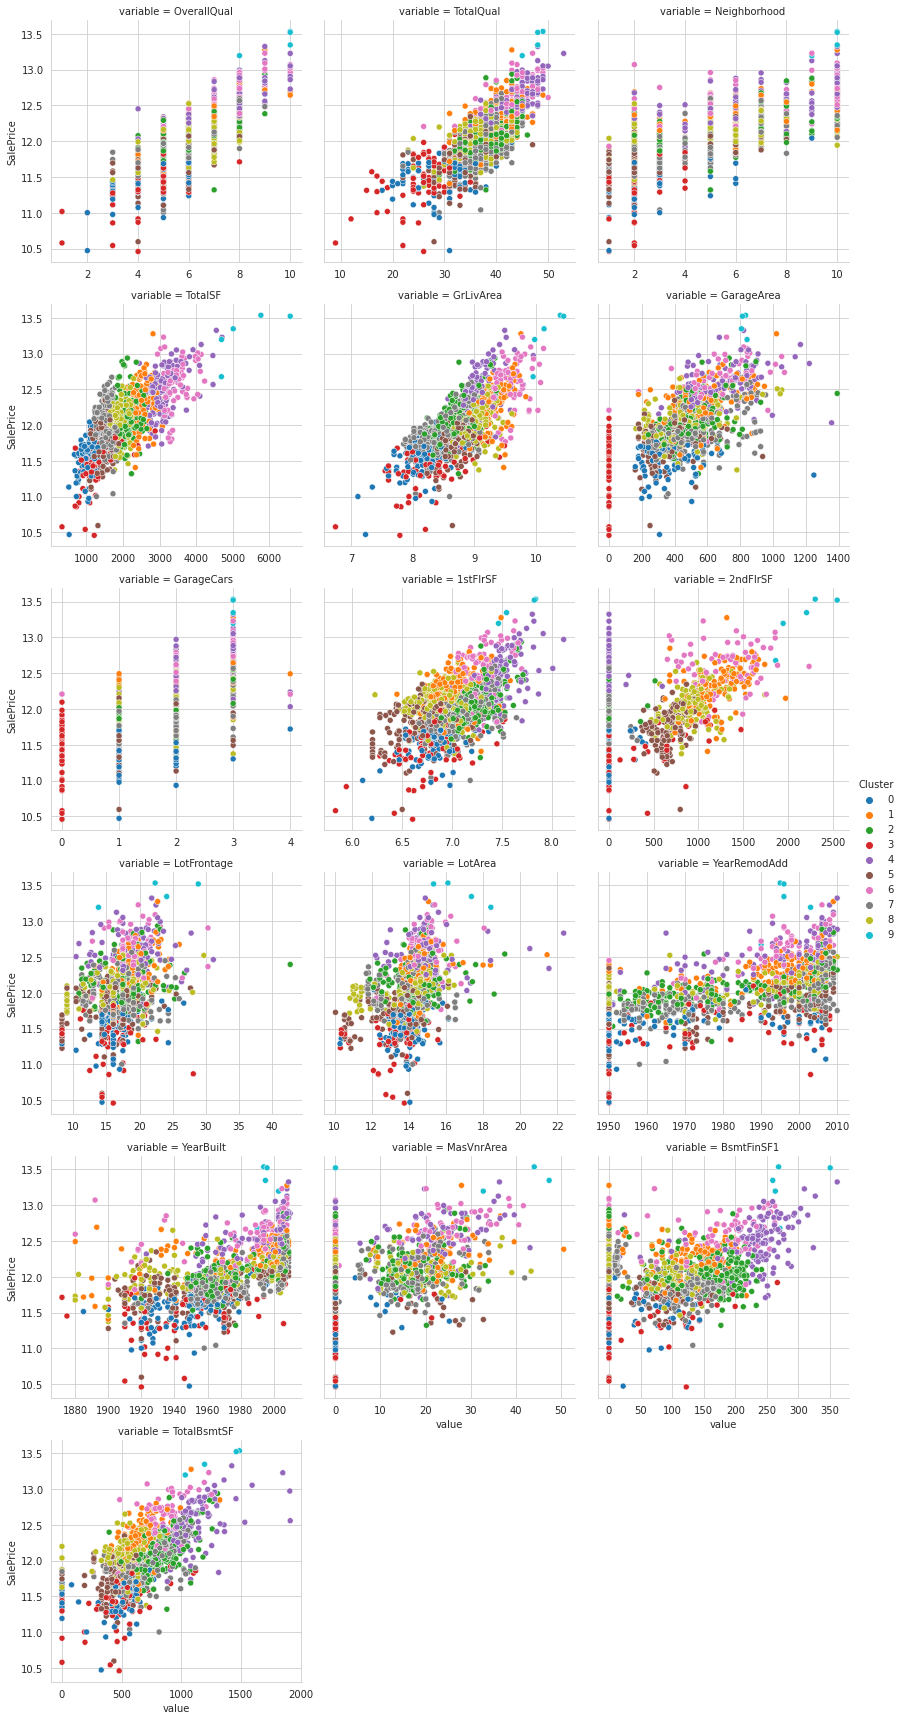

In [32]:
columns=[ "OverallQual", "TotalQual", "Neighborhood", "TotalSF",
         "GrLivArea", 
         "GarageArea","GarageCars",
         "1stFlrSF","2ndFlrSF", 
         'LotFrontage',"LotArea","YearRemodAdd",
        "YearBuilt","MasVnrArea","BsmtFinSF1","TotalBsmtSF",]
Xy = X.copy()
Xy["Cluster"] = Xy.Cluster.astype("category")
Xy["SalePrice"] = y
sns.relplot(
    x="value", y="SalePrice", hue="Cluster", col="variable",
    height=4, aspect=1, facet_kws={'sharex': False}, col_wrap=3,
    data=Xy.melt(
        value_vars=columns,
        id_vars=["SalePrice", "Cluster"],
    ),
);


In [33]:
X.pop("Cluster")

0       1
1       2
2       1
3       8
4       1
       ..
1452    7
1453    5
1454    4
1455    1
1456    2
Name: Cluster, Length: 1457, dtype: int32

In [34]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)


In [35]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 2)
model.fit(X, y_transformed)


KNeighborsClassifier(n_neighbors=2)

In [36]:
predictions = model.predict(X_test)


In [37]:
preds=lab.inverse_transform(predictions)


In [38]:
y_predict = np.floor(np.expm1(preds))
y_predict

array([164900., 129000., 145000., ..., 167999.,  98000., 219999.])

In [39]:
Id=dummy_testdata.Id

In [40]:
train_data["SalePrice"]
len(preds)

1459

In [41]:
print(len(Id))
print(len(y_predict))

1459
1459


In [42]:
#compare values 
output = pd.DataFrame({'Id':Id,'SalePrice': y_predict})
output
output.to_csv('/kaggle/working/submission.csv', index=False)